<a href="https://colab.research.google.com/github/ar-aman/Potato-Disease-Classification/blob/main/potato_disease_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
n_classes = 3
EPOCHS = 50

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/Potato_disease_classification/Potato",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2172 files belonging to 3 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
type(class_names)

list

In [ ]:
len(dataset)

68

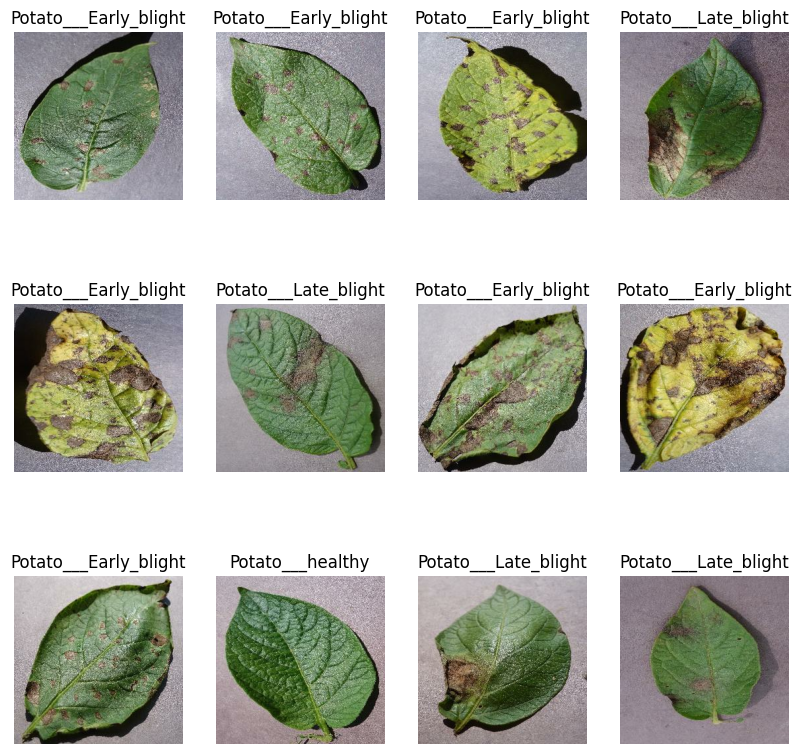

In [ ]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype(int))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [ ]:
def get_dataset_partition_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, train_size=54, shuffle=True, shuffle_size=10000):

    ds_size = len(ds)

    if shuffle:
        ds  = ds.shuffle(shuffle_size, seed=12)

    tarin_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(tarin_size)

    val_ds = ds.skip(tarin_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partition_tf(dataset)

In [ ]:
print(len(train_ds), len(val_ds), len(test_ds))

54 6 8


In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal_and_vertical'),
    layers.RandomRotation(0.2)
])

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3), input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3), input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3), input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3), input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3), input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')

])

model.build(input_shape = (32,256,256,3))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 32)          0         
 g2D)                                                 

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 [==============================] - 268s 186ms/step - loss: 0.7159 - accuracy: 0.6568 - val_loss: 0.4908 - val_accuracy: 0.7865
Epoch 2/50
54/54 [==============================] - 3s 48ms/step - loss: 0.4150 - accuracy: 0.8235 - val_loss: 0.2474 - val_accuracy: 0.9062
Epoch 3/50
54/54 [==============================] - 3s 48ms/step - loss: 0.3409 - accuracy: 0.8628 - val_loss: 0.3411 - val_accuracy: 0.8438
Epoch 4/50
54/54 [==============================] - 3s 49ms/step - loss: 0.2494 - accuracy: 0.8993 - val_loss: 0.1698 - val_accuracy: 0.9427
Epoch 5/50
54/54 [==============================] - 3s 49ms/step - loss: 0.1584 - accuracy: 0.9387 - val_loss: 0.1364 - val_accuracy: 0.9583
Epoch 6/50
54/54 [==============================] - 3s 48ms/step - loss: 0.1576 - accuracy: 0.9352 - val_loss: 0.1476 - val_accuracy: 0.9583
Epoch 7/50
54/54 [==============================] - 3s 49ms/step - loss: 0.1288 - accuracy: 0.9433 - val_loss: 0.1588 - val_accuracy: 0.9479
Epoch 8/50

In [ ]:
scores = model.evaluate(test_ds)
scores

8/8 [==============================] - 7s 22ms/step - loss: 0.0713 - accuracy: 0.9570


[0.07127480953931808, 0.95703125]

In [ ]:
history

In [ ]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

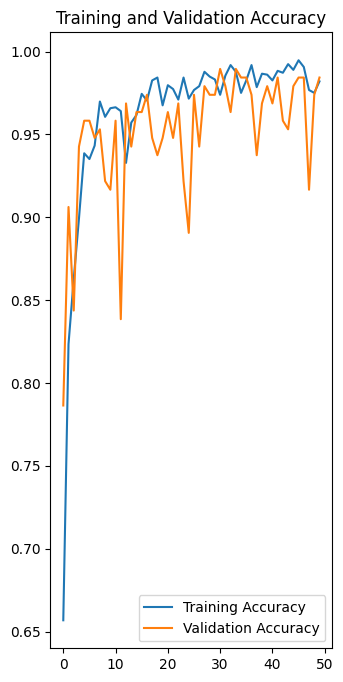

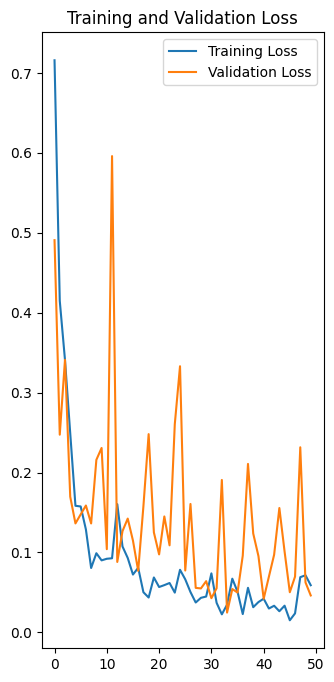

In [ ]:
# accuracy chart
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
# loss chart
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 0s 174ms/step
predicted label: Potato___Early_blight


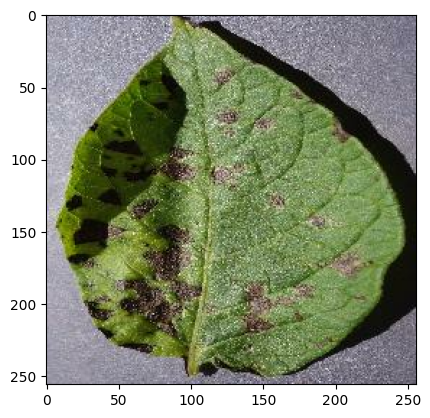

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

  first_image = images_batch[0].numpy().astype('int')
  first_label = labels_batch[0].numpy()

  print('first image to predict')
  plt.imshow(first_image)
  print('actual label:', class_names[first_label])

  batch_prediction = model.predict(images_batch)
  print('predicted label:', class_names[np.argmax(batch_prediction[0])])

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/Potato_disease_classification/xyz.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
with open("model.json", "r") as json_file:
    loaded_model_json = json_file.read()
model = keras.models.model_from_json(loaded_model_json)

In [ ]:
def predict(model, img):
  img_array = tf.keras.preprocessing.image.img_to_array(img.numpy())
  img_array = tf.expand_dims(img_array, 0)
  prediction = model.predict(img_array)
  predicted_class = class_names[np.argmax(prediction[0])]
  confidence = round(100 * (np.max(prediction[0])), 2)
  return predicted_class, confidence


In [ ]:
sample = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/Potato_disease_classification/Potato/",
    shuffle=True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE)
)

1/1 [==============================] - 0s 52ms/step


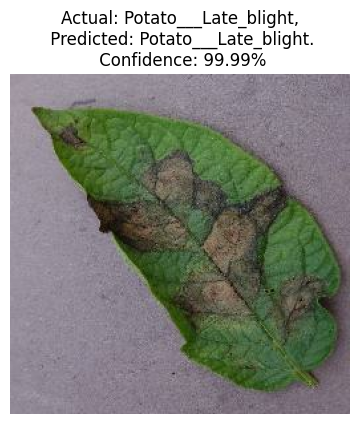

In [ ]:
import numpy as np
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
  for i in range(1):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype("int"))

    predicted_class, confidence = predict(model, images[i])
    actual_class = class_names[labels[i]]
    plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
    plt.axis('off')

In [ ]:
!pip freeze > requirements.txt

In [ ]:
MyModel = models.load_model('/content/drive/MyDrive/Colab Notebooks/Potato_disease_classification/model.h5')